#   **Signals and Systems**
##  **Exam 1 : Bonus- Simulation**
####  *Student: Edward Fabian Goyeneche velandia - 1007540013*
#### *Teacher:Ph.D. Andres Marino Alvares Meza*
#####  *Department of electrical, electronic and computer engineering (DIEEC)*
#####  *Universidad Nacional de Colombia - Sede Manizales*
##### *2023-I*

## *2.3 Bonus* ## 

Diseñe e implemente en python , el proceso de digitalizacion de la señals del punto 2.1. Utilizando una  tarjeta de diditalizacion
de 3 bits con entrada analoga de 0 a 5V.



## *$$SOLUCION$$*


Primero tenemos que realizar el punto 2.1 para determinar la Señal y todos sus compeonentes para luego pasar a su proceso
digitalizacion.

**2.1**  Determinar si la siguiente señal es periódica, aperiódica o cuasi- periódica. En caso de ser periódica o cuasi periódicas. Determine el valor del periodo.

$$x(t)= 7 sin⁡ (\frac{4t-π}{2})-2 cos⁡(5t)+2 cos⁡ (10t)$$


* Tomando el primer termino de la señal:

$$x_1(t) = 7 \sin(4t - \frac{\pi}{2})$$



* Para este primer termino debemos encontrar el periodo de la funcion seno que esta dada en $T$:

$$T_{\sin} = \frac{2\pi}{4} = \frac{\pi}{2}$$

* Lo que nos da que el primer termino es  cuasi-peridica con un periodo de:

$$\frac{\pi}{2} segundos.$$



* Para el segundo término:

$x_2(t) = -2\cos(5t)$

* Para el periodo de la funcion Coseno que estaria dada:

$$T_{\cos} = \frac{2\pi}{5}$$

* Lo que nos da que el segundo termino es una funcion Coseno, que es Periodica

$$\frac{2\pi}{5}segundos.$$


* Para el tercer término:

$$x_3(t) = 2\cos(10t)$$


* Para el funcion  de la Funcion Coseno dada en $T$

$$T_{\cos} = \frac{2\pi}{10} = \frac{\pi}{5}$$

* Lo que nos da que el termino es periodico y tiene como periodo:

 $$\frac{\pi}{5} segundos.$$


Para determinar si la Señal es periodica, aperiodica o Cuasi-periodica, tenemos  es una señal con la suma de los terminos,
cada uno  con un periodo diferente , estos nos da para deducir que la señal es Cuasi-periodica, entonces para determinar el 
periodo de la señake ss el Minimo Comun multiplo  $MCM$ de los periodos de los terminos de la señal.

$$\frac{\pi}{2} ;\frac{2\pi}{5} ; \frac{\pi}{5} = \frac{2\pi}{5}$$

Lo que nos da que el periodo de la señal: 
$$\frac{2\pi}{5} segundos.$$













# ______________________________________________________________

# Digitalizacion de señal



- *importamos las librerías necesarias para trabajar con señales y realizar gráficas para visualizarlas*.

In [26]:
#importamos las librerias que llegamos a necesitar
import numpy as np
import matplotlib.pyplot as plt     
from scipy.spatial.distance import cdist

- *hacemos uso del conceptp de cero y pendiente ,  ya que tenemo un rango de voltaje de entrada,de tal manera que la señal se ajuste a este rango llamamos la funcion que el docente nos proporcionó en clase*

In [25]:
#función cero y pendiente
def my_ceropend(x,xhmax=5,xhmin=0):
  #cálculo de pendiente y cero
  m = (xhmax-xhmin)/(x.max()-x.min())
  b = xhmin - m*x.min()
  xh = m*x+b
  return xh

- *Con los datos obtenido con la solucion del punto 2.1, definimos los parametros de la señal , es decir amplitudes y frecuencias*

In [27]:
# Generamos la señal dada                                                
T1 = np.pi/2  
T2 = 2*np.pi /5
T3 = np.pi / 5 
T =  2*np.pi /5  
F1 = 1 /T1
F2 = 2 / T2
F3 = 2 / T3                                                                              
Fs = 5*max(F1,F2,F3)
time = np.arange(0,5*T,1/Fs)
signal_Cperoidica = 7*np.sin(4*time - np.pi/2) - 2*np.cos(5*time) + 2*np.cos(10*time)

- *Se define el rango de voltajes que puede tomar la señal de entrada y se cuantifica la señal utilizando una tarjeta de digitalización de 3 bits.Se define el número de estados de cuantificación  y la resolución de que llega a tener cada estadp, que dependerá del rango de voltajes y la cantidad de estados.lo que da a tengamos que crear un vector de estados **(vEstados)** que contiene los valores de voltaje correspondientes a cada estado. Luego, se realiza la cuantificación de la señal (señalDigitalizada) mediante un proceso  que tenemos que redondedear  al estado más cercano para cada valor de la señal de entrada.*

In [28]:

voltajeMax = 5                                                                  #En esta porcion de codigo diseñamos la tarjeta de adquisicion  de 3 bit
voltajeMin = 0                                                                  # lo podemos implementar en una funcion, pero para el ejercicio la dejamos así.
voltaje = my_ceropend(signal_Cperoidica,voltajeMax, voltajeMin).reshape(-1,1) 
nBits = 3
estados = 2**nBits                                                  
resolucion = (voltajeMax- voltajeMin)/estados                                                             
vEstados = np.arange(voltajeMin,voltajeMax,resolucion).reshape(-1,1)

señalDigitalizada=np.zeros(len(voltaje))
for i in range(len(voltaje)):
  señalDigitalizada[i] = vEstados[np.argmin(cdist(voltaje[i].reshape(-1,1),vEstados))]
#para obtener la  señal en los pasos dados, luego esto los redondeamos
#cada uno de los pasos de nivel de cuantificacion mas cercano. finalmente
# multiplicamos por los pasos y obetenemos ta la señal cuantificada.


- *se grafica la señal de entrada y la seañal digitalizada*

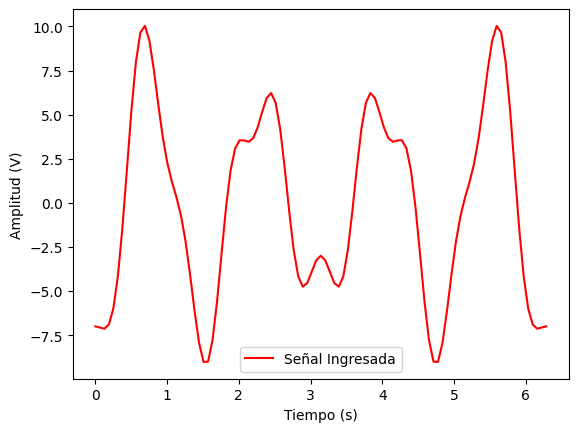

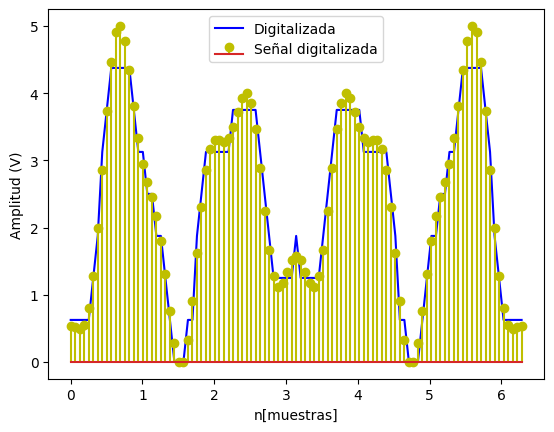

In [23]:

plt.plot(time, signal_Cperoidica,"r", label="Señal Ingresada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.legend()
plt.show()

plt.plot(time, señalDigitalizada,"b", label="Digitalizada")
plt.stem(time,voltaje, "y",label="Señal digitalizada")
plt.xlabel("n[muestras]")
plt.ylabel("Amplitud (V)")
plt.legend()
plt.show()



